# Midterm: Classification Analysis: Heart Disease Prediction
**Author:** Mhamed  
**Date:** 04, 05, 2025 

## Introduction

The objective of this classification analysis was to apply classification modeling techniques to predict heart disease risk using a dataset with various patient features, including age, sex, blood pressure, cholesterol levels, and more. The aim was to develop a machine learning model capable of accurately classifying whether a patient is likely to have heart disease based on these features. 

Ultimately, the goal was to create a model that could assist in predicting heart disease risk, while showcasing the practical use of classification algorithms in a real-world healthcare scenario.

## Section 1. Import and Inspect the Data

In [56]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [57]:
# 1.1 Load the dataset and display the first 10 rows.

# Load Heart disease dataset 

df = pd.read_csv(r"C:\Projects\ml_classification_Mhamed\Data\Heart_Disease.csv")
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3  

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use "info()" to check data types and missing values.
2. Use "describe()" to see summary statistics.
3. Use "isnull().sum()" to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [58]:
# Check data types and missing values

print("Data Info:")
df.info()

# Summary statistics
print("Summary Statistics:")
df.describe()
print(df.describe())

# Check for missing values in each column
print("Missing values:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Reflection 1: What do you notice about the dataset? Are there any data issues?

The dataset is relatively clean, with all columns containing 303 non-null entries and no missing values. However, there are some potential data issues, such as possible outliers in the numerical columns, particularly in chol (ranging from 126 to 564) and thalach. Additionally, the target variable appears to be imbalanced, which could present challenges when building predictive models.

In [59]:
# Rename the target column: num to target
# Assuming your DataFrame is named df
df.rename(columns={'num': 'target'}, inplace=True)

# To verify the change, you can print the first few rows
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     6       0  
1   3     3       2  
2   2     7       1  
3   0     3       0  
4   0     3       0  


## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

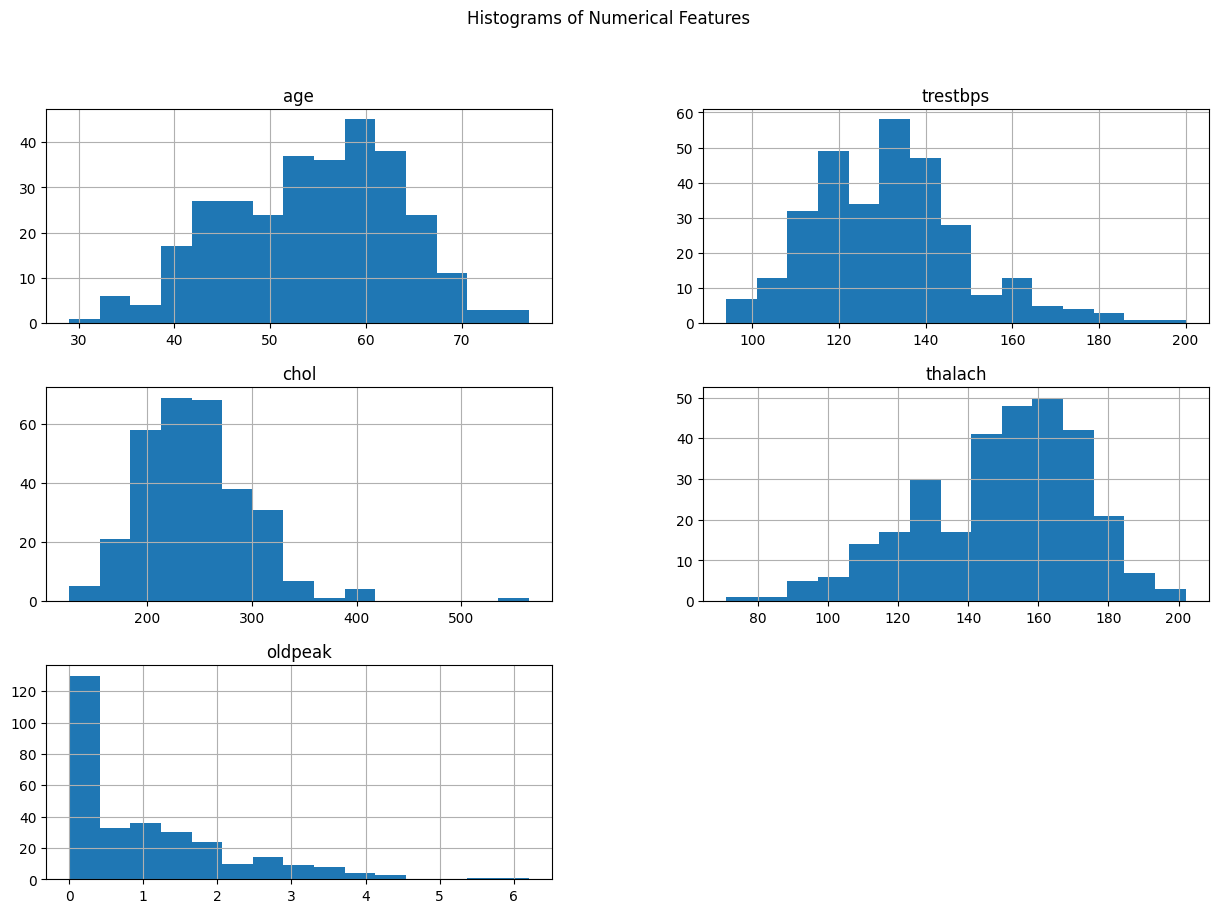

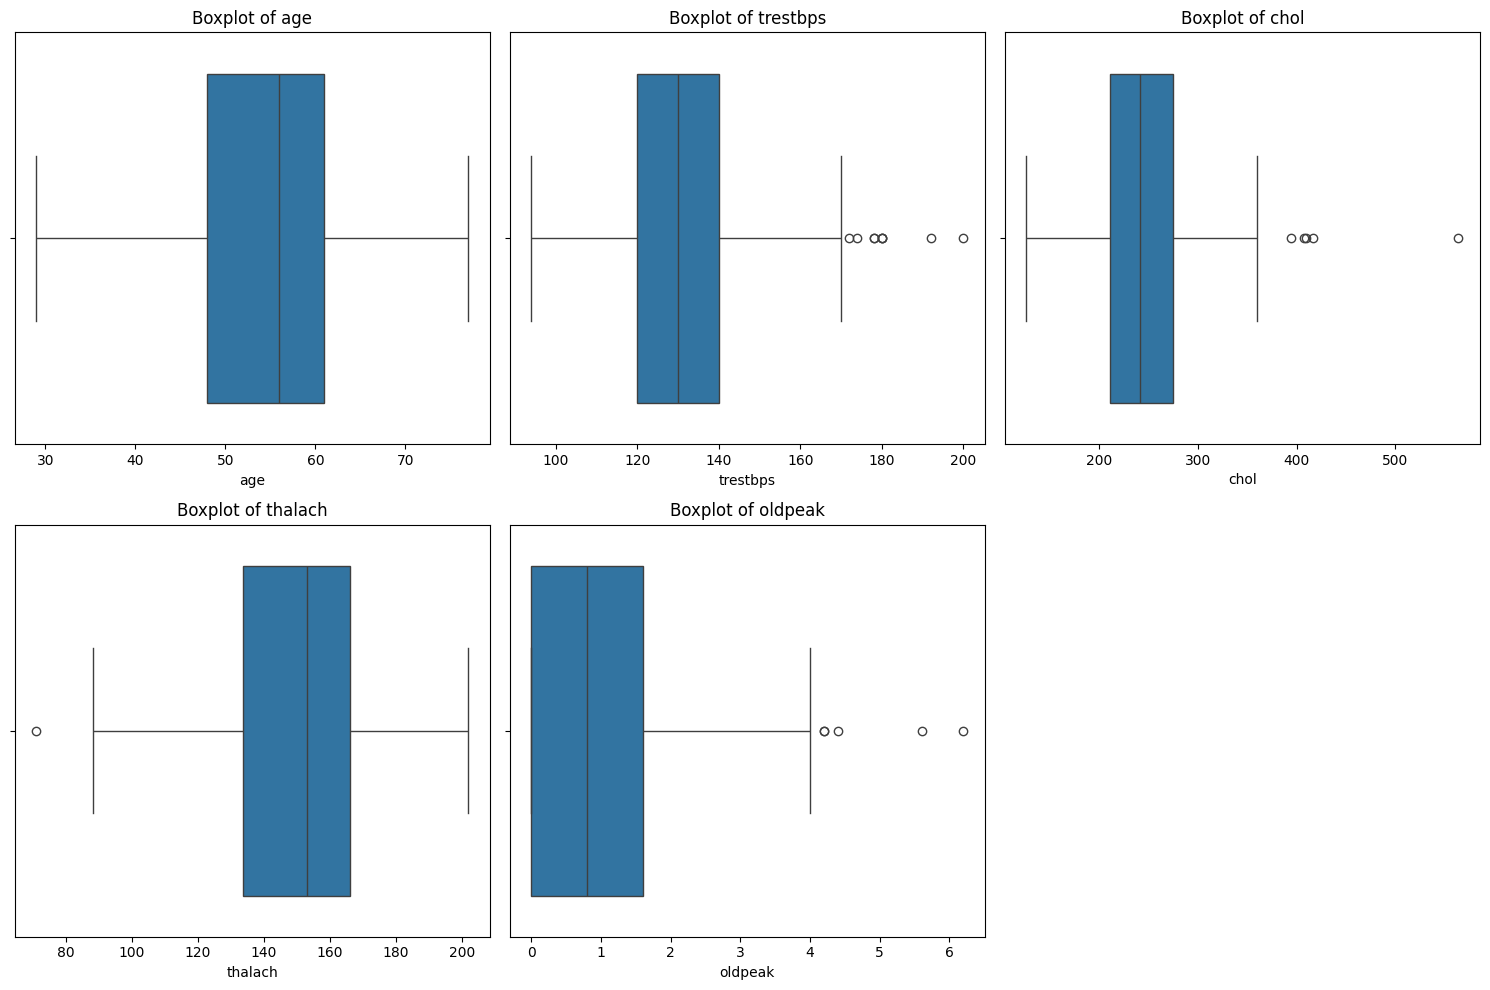

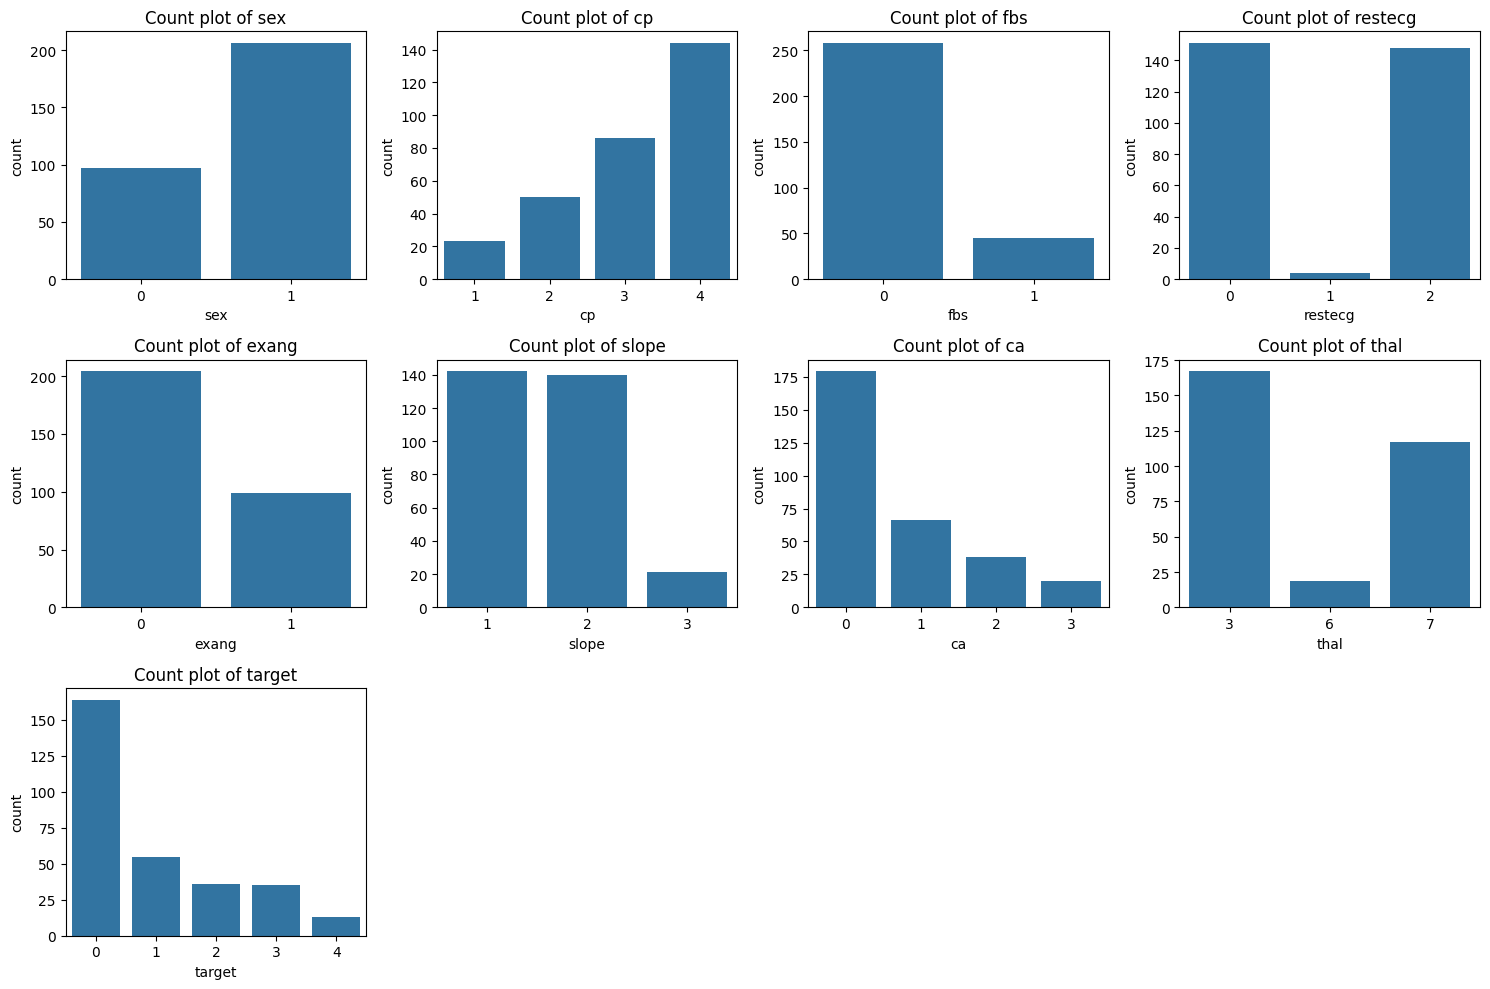

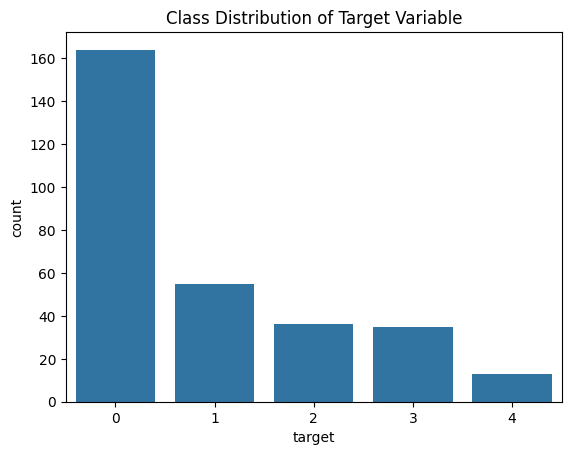

In [60]:
# Plot histograms for numerical features
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

# Check class distribution of the target variable
sns.countplot(x=df['target'])
plt.title('Class Distribution of Target Variable')
plt.show()

### 2.2 Handle missing values and clean data


Data after removing outliers: (284, 14)

Cleaned and Encoded Data Preview
   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_2   cp_3   cp_4  \
0   63       145   233      150      2.3       0   True  False  False  False   
1   67       160   286      108      1.5       2   True  False  False   True   
2   67       120   229      129      2.6       1   True  False  False   True   
3   37       130   250      187      3.5       0   True  False   True  False   
4   41       130   204      172      1.4       0  False   True  False  False   

   ...  restecg_1  restecg_2  exang_1  slope_2  slope_3   ca_1   ca_2   ca_3  \
0  ...      False       True    False    False     True  False  False  False   
1  ...      False       True     True     True    False  False  False   True   
2  ...      False       True     True     True    False  False   True  False   
3  ...      False      False    False    False     True  False  False  False   
4  ...      False       True    False    Fal

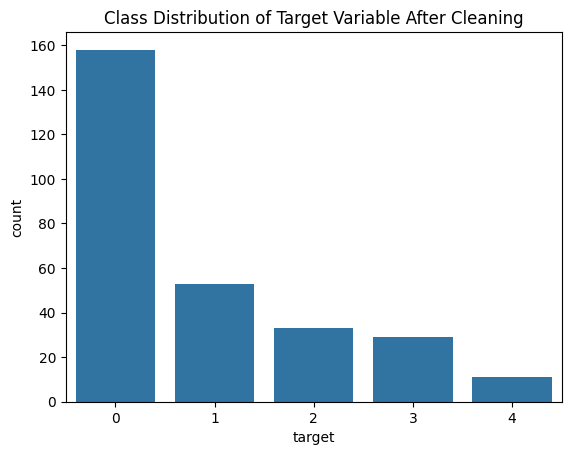

In [61]:
# Handle missing values: We already checked out that and there is no missing values.
# Remove or transform outliers.
# Calculate the IQR (Interquartile Range) and define outlier thresholds
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers that fall outside of the defined range
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Check data after removing outliers
print(f"\nData after removing outliers: {df_no_outliers.shape}")

# Encode categorical variables (excluding 'target')
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Perform one-hot encoding for categorical columns, excluding 'target'
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns, drop_first=True)

# Display cleaned and encoded data
print("\nCleaned and Encoded Data Preview")
print(df_encoded.head())


# Check the class distribution after cleaning (using the 'target' column)
sns.countplot(x=df_encoded['target'])
plt.title('Class Distribution of Target Variable After Cleaning')
plt.show()

### 2.3 Feature selection and engineering

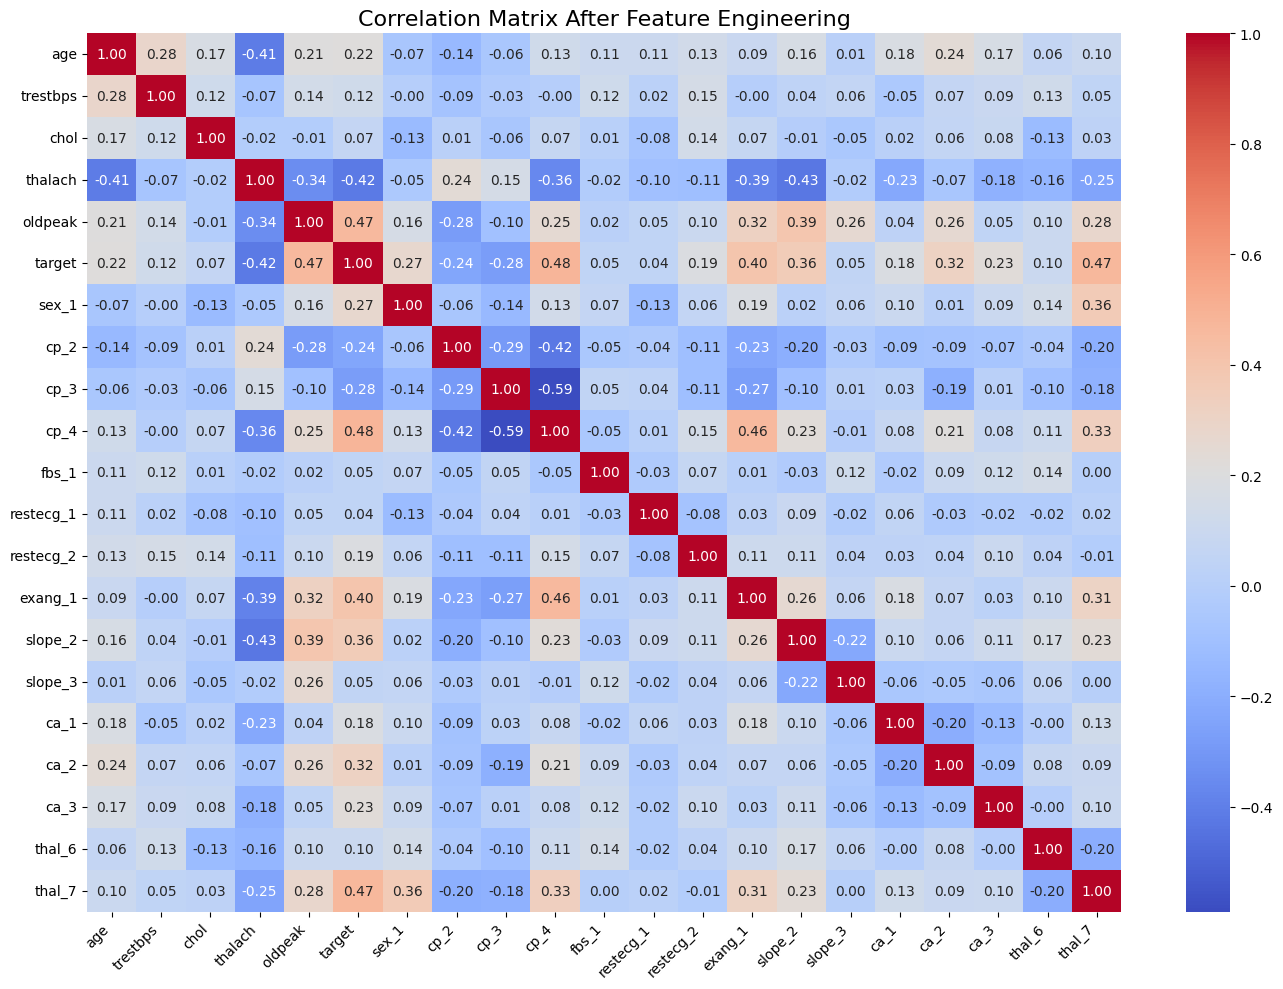

In [62]:
# Checking if 'age_group' exists
if 'age_group' in df_encoded.columns:
    # Encode 'age_group' column if it's a category
    if df_encoded['age_group'].dtype == 'category':
        print(f"Encoding 'age_group' column...")
        label_encoder = LabelEncoder()
        df_encoded['age_group'] = label_encoder.fit_transform(df_encoded['age_group'])

# Convert boolean columns to 0 or 1 (True -> 1, False -> 0)
bool_columns = df_encoded.select_dtypes(include=[bool]).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# Keep only numeric columns for correlation calculation
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the correlation matrix with improved readability
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Correlation Matrix After Feature Engineering", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

Patterns and Anomalies:
Age and Thalach (Maximum Heart Rate): Moderate negative correlation between age and thalach. Older individuals tend to have lower heart rates. 

Oldpeak (Depression induced by exercise) and Target: Strong relationship: Higher values of oldpeak (indicating greater depression during exercise) seem to be associated with the presence of heart disease.

Preprocessing Steps:
Outliers: Certain features like chol (cholesterol) and thalach (maximum heart rate) have outliers. These outliers were removed using  the Interquartile Range IQR method.

Feature Encoding: I used One-Hot Encoding for categorical variables like sex, cp, fbs, restecg, exang, slope, ca, and thal to convert these categorical features into numerical form.

Feature Engineering:
* Encoding 'age_group': If the 'age_group' column is categorical, it's encoded into numeric values using LabelEncoder. 

* Converting Boolean Columns: Boolean columns are converted to integers (True → 1, False → 0) for numerical consistency.

* Selecting Numeric Columns: Only numeric columns are selected for correlation calculation to avoid including non-numeric data in the analysis.

* Calculating and Visualizing Correlation: A correlation matrix is computed to assess the relationships between numeric features, helping identify redundant or highly correlated features. The correlation matrix is visualized using a heatmap for easier interpretation.

# Section 3. Feature Selection and Justification
3.1 Choose Features and Target

We need to choose input features and a target variable based on the given dataset. The input features can include both numerical and categorical variables, while the target variable is categorical. The goal of this project is to predict whether an individual has heart disease or not.

In [63]:
# Define input features (X) and target variable (y)

# Define numerical and categorical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Target column - 'target' represents whether the person has heart disease (1) or not (0)
target_column = 'target'

# Define feature matrix (X) by selecting relevant input features
X = df[numerical_columns + categorical_columns]

# Define target vector (y)
y = df[target_column]

# Display the shapes of X and y
print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)

Feature matrix (X) shape: (303, 13)
Target vector (y) shape: (303,)


3.2 Define X and y

In [64]:
# 3.2 Define X and y
# X is the feature matrix, which consists of the input features
# y is the target vector, which contains the target variable

# X is the feature matrix containing the selected relevant input features (numerical and categorical)
# y is the target vector containing the target variable (heart disease diagnosis)

# Display the shapes of X and y again for confirmation
print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)

# Display the first few rows of X and y to confirm they are correctly defined
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of y:")
print(y.head())

Feature matrix (X) shape: (303, 13)
Target vector (y) shape: (303,)

First few rows of X:
   age  trestbps  chol  thalach  oldpeak  sex  cp  fbs  restecg  exang  slope  \
0   63       145   233      150      2.3    1   1    1        2      0      3   
1   67       160   286      108      1.5    1   4    0        2      1      2   
2   67       120   229      129      2.6    1   4    0        2      1      2   
3   37       130   250      187      3.5    1   3    0        0      0      3   
4   41       130   204      172      1.4    0   2    0        2      0      1   

   ca  thal  
0   0     6  
1   3     3  
2   2     7  
3   0     3  
4   0     3  

First few rows of y:
0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64


Reflection 3:
Why did you choose these features? How might they impact predictions or accuracy?

I chose these features because each one represents a well-documented risk factor for heart disease. These features, when used together, are likely to provide a comprehensive understanding of an individual’s cardiovascular health, improving the model's ability to predict heart disease. 

# Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

4.1 Split the data into training and test sets using train_test_split

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split into training and test sets (80% train, 20% test), stratify for balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (227, 20), Test data shape: (57, 20)


4.2 Train model using Scikit-Learn model.fit() method.

In [66]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings related to ConvergenceWarning and UndefinedMetricWarning (generic warning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data (X_train, y_train)
model.fit(X_train, y_train)

# Predict on the test data (X_test)
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (includes precision, recall, f1-score, etc.)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.6316

Confusion Matrix:
[[31  1  0  0  0]
 [ 8  0  2  1  0]
 [ 0  1  4  1  0]
 [ 1  2  2  1  0]
 [ 0  1  1  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.00      0.00      0.00        11
           2       0.44      0.67      0.53         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63        57
   macro avg       0.31      0.36      0.32        57
weighted avg       0.52      0.63      0.56        57



4.3 Evalulate performance

We evaluate the model's performance using the following metrics:

* Accuracy: The proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
* Precision: The proportion of positive predictions that are actually correct, i.e., how many of the instances predicted as positive are truly positive.
* Recall: The proportion of actual positive instances that are correctly predicted, i.e., how many of the actual positives were identified by the model.
* F1-Score: The harmonic mean of precision and recall, providing a balanced measure that considers both metrics.
* Confusion Matrix: A matrix that displays the counts of true positives, true negatives, false positives, and false negatives, giving a detailed view of the model’s prediction performance.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79        32
           1       0.25      0.18      0.21        11
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.60        57
   macro avg       0.39      0.29      0.30        57
weighted avg       0.54      0.60      0.54        57

Random Forest Accuracy Score: 0.5964912280701754


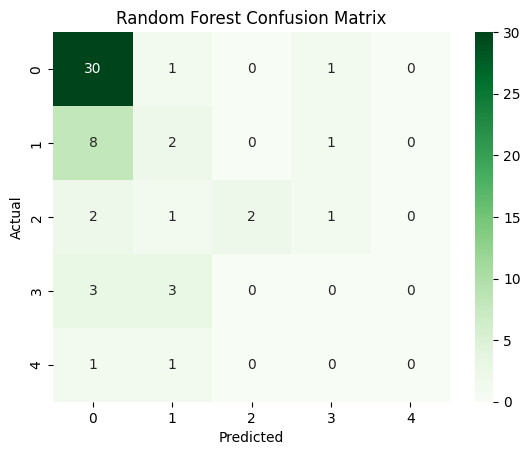

In [67]:
# Evaluate and Compare Performance
# Print performance report

from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier()
# Train the Random Forest model on the training data (X_train, y_train)
rf_model.fit(X_train, y_train)
# Predict on the test data (X_test) using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Reflection 4:
How well did the model perform? Any surprises in the results?

The Random Forest model has an accuracy of 56.14%, indicating moderate performance. Class 0 performs well in recall (0.91) but has lower precision (0.66), while Class 1 performs poorly with both low precision (0.11) and recall (0.09), suggesting it may be underrepresented. Class 2 has good precision (0.67) but low recall (0.33), and Classes 3 and 4 are not predicted at all, likely due to underrepresentation.

The macro average scores are low, reflecting poor performance in smaller classes. To improve, addressing class imbalance may be necessary to boost the model's performance

# Section 5. Improve the Model or Try Alternates (Implement a Second Option)
5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

We will train an alternative classification model, such as a Decision Tree or Random Forest, and compare its performance with that of the Logistic Regression model. The goal is to determine which model better addresses the issues of class imbalance and low performance.

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(cm_dt)

# Classification Report for Decision Tree
report_dt = classification_report(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:")
print(report_dt)

Decision Tree Accuracy: 0.4211

Decision Tree Confusion Matrix:
[[20  2  4  4  2]
 [ 4  4  0  3  0]
 [ 2  3  0  1  0]
 [ 0  4  1  0  1]
 [ 0  2  0  0  0]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        32
           1       0.27      0.36      0.31        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        57
   macro avg       0.21      0.20      0.20        57
weighted avg       0.48      0.42      0.45        57



5.2 Compare performance of all models across the same performance metrics.

To assess which model performs the best, we will compare the performance of all models (Logistic Regression, Random Forest and Decision tree) using consistent evaluation metrics: accuracy, precision, recall, F1-score, and the confusion matrix.

By summarizing the results, we can determine which model is more effective at handling the data, particularly in terms of addressing class imbalance and improving overall prediction accuracy.

A. Logistic Regression

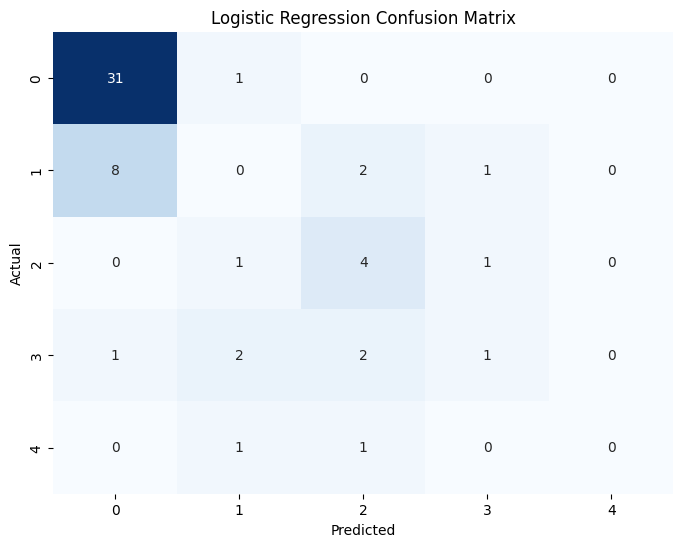

Logistic Regression Accuracy: 0.631578947368421
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.00      0.00      0.00        11
           2       0.44      0.67      0.53         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63        57
   macro avg       0.31      0.36      0.32        57
weighted avg       0.52      0.63      0.56        57



In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (features and labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression")

# Evaluate model
accuracy_lr = lr_model.score(X_test, y_test)
report_lr = classification_report(y_test, y_pred_lr)

# Print results
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:")
print(report_lr)

B. Random Forest

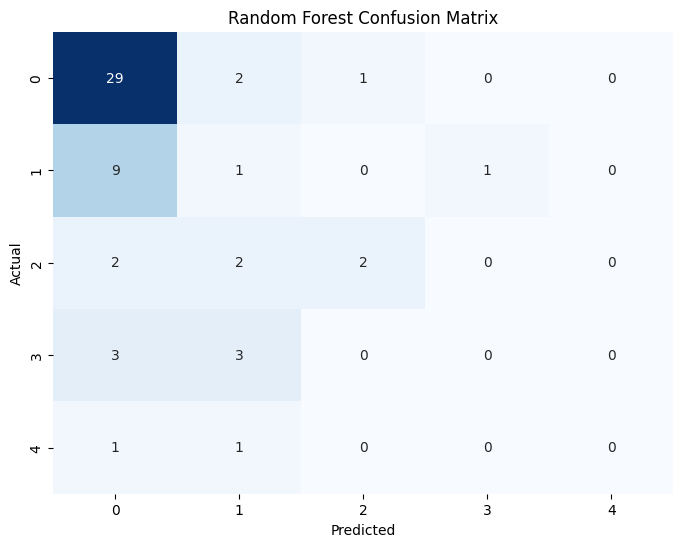

Random Forest Accuracy: 0.5614035087719298
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        32
           1       0.11      0.09      0.10        11
           2       0.67      0.33      0.44         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        57
   macro avg       0.29      0.27      0.26        57
weighted avg       0.46      0.56      0.49        57



In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (features and labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Evaluate model
accuracy_rf = rf_model.score(X_test, y_test)
report_rf = classification_report(y_test, y_pred_rf)

# Print results
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)

C. Decision Tree

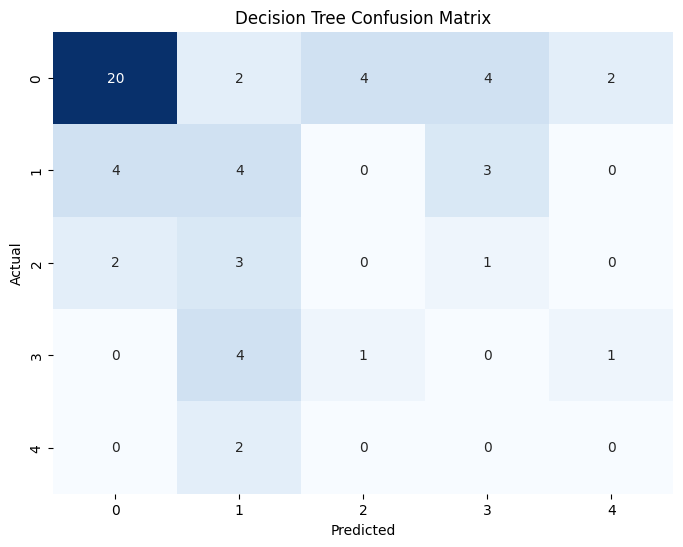

Decision Tree Accuracy: 0.42105263157894735
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        32
           1       0.27      0.36      0.31        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        57
   macro avg       0.21      0.20      0.20        57
weighted avg       0.48      0.42      0.45        57



In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (features and labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, "Decision Tree")

# Evaluate model
accuracy_dt = dt_model.score(X_test, y_test)
report_dt = classification_report(y_test, y_pred_dt)

# Print results
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Classification Report:")
print(report_dt)

D. Summary 


===== Model Performance Summary =====
                 Model  Accuracy  F1-Score (Macro Avg)
0  Logistic Regression  0.631579              0.323333
1        Random Forest  0.561404              0.261520
2        Decision Tree  0.421053              0.199469


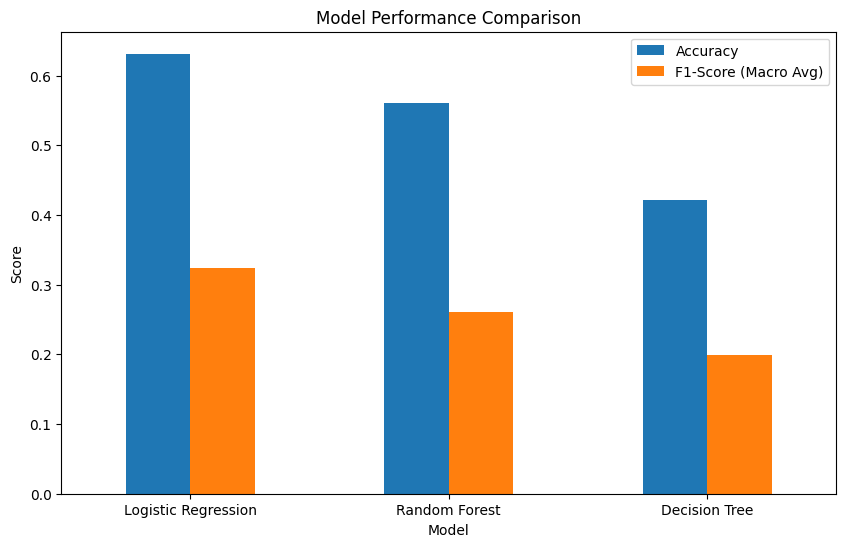

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are already defined (features and labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluate models
accuracy_lr = lr_model.score(X_test, y_test)
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_dt = dt_model.score(X_test, y_test)

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Extract key metrics from the classification reports
def extract_metrics(report):
    accuracy = report['accuracy']
    f1_macro = report['macro avg']['f1-score']
    return accuracy, f1_macro

# Extract metrics for each model
acc_lr, f1_lr = extract_metrics(report_lr)
acc_rf, f1_rf = extract_metrics(report_rf)
acc_dt, f1_dt = extract_metrics(report_dt)

# Create a summary table using pandas DataFrame
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_rf, acc_dt],
    'F1-Score (Macro Avg)': [f1_lr, f1_rf, f1_dt]
})

# Display the summary table
print("\n===== Model Performance Summary =====")
print(summary_df)

# Optional: Visualize the performance comparison
summary_df.set_index('Model')[['Accuracy', 'F1-Score (Macro Avg)']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

Based on the model performance comparison, Logistic Regression performed the best with an accuracy of 63.16%. It showed the highest overall performance, with high precision and recall for class 0. It had some success with classes 2 and 3 but struggled with classes 1 and 4.

Logistic regression outperformed the other models due to its simplicity, regularization, and ability to manage class imbalance. However, it still had limitations with certain classes, suggesting room for improvement using advanced techniques.

# Section 6. Final Thoughts & Insights
6.1 Summarize findings.

We evaluated three machine learning models in this midterm project: Logistic Regression, Random Forest, and Decision Tree. Below are the key findings:

Logistic Regression was the top-performing model, with an accuracy of 0.63. It performed well on the majority class (class 0) but faced challenges in accurately classifying the minority classes, particularly classes 1, 3, and 4, where precision and recall were very low. The model's weighted average F1-score of 0.56 highlights its struggle with these imbalanced classes.

Random Forest achieved a slightly lower accuracy of 0.56 compared to Logistic Regression. It performed reasonably well on class 0 and class 2 but struggled with the minority classes, particularly class 3 and class 4, where it had zero precision and recall. The model's macro and weighted averages indicate its difficulty in handling imbalanced data.

Decision Tree was the worst-performing model, with an accuracy of 0.42. It showed poor results across all classes, especially the minority classes (1, 2, 3, and 4), where it failed to make accurate predictions, leading to low precision and recall.

In conclusion, Logistic Regression was the best-performing model in this evaluation. However, all three models struggled with accurately classifying the minority classes, which is likely due to the class imbalances present in the dataset.

6.2 Discuss challenges faced.

* Class Imbalance: The major challenge was the class imbalance.

* Model Overfitting: example: The decision tree with minority classes.

6.3 If you had more time, what would you try next?

If I had more time, I would focus on improving the model by addressing class imbalance through resampling techniques like SMOTE or undersampling, as well as adjusting class weights. Additionally, I would explore advanced models such as Gradient Boosting, XGBoost, and potentially Neural Networks, if resources permit.



Reflection 6: What did you learn from this project?

I learned that understanding both the data and models is key in machine learning. Class imbalance greatly affects model performance, influencing accuracy and predictions. Model selection and evaluation are crucial, as simpler models like logistic regression can outperform more complex ones depending on the dataset. Tuning models and managing overfitting are essential, especially with limited data. Lastly, I realized that metrics like precision, recall, and F1-score are vital for evaluating models, particularly with imbalanced datasets.